In [4]:
# Exploratory Data Analysis:</h1>
# EDA is an approach to analyze data in order to:
# - summarize main characteristics of the data <\n>
# - gain better understanding of the dataset,
# - uncover relationships between different variables, and
# - extract important variables for the problem we are trying to solve.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("clean_df.csv")
df.drop("city-mpg", axis=1, inplace=True)
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,highway-L/100km,price,city-L/100km,horsepower-binned,diesel,gas
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,8.703704,13495.0,11.190476,Low,0,1
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,8.703704,16500.0,11.190476,Low,0,1
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000.0,9.038462,16500.0,12.368421,Medium,0,1
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102,5500.0,7.833333,13950.0,9.791667,Low,0,1
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115,5500.0,10.681818,17450.0,13.055556,Low,0,1


In [5]:
# Descriptive Statistics:
# Descriptive statistical analysis helps to describe basic features of a dataset and obtains a short summary about the 
# sample and measures of the data.
# One way in which we can do this is by using
df.describe() # Any NaN values are automatically skipped in these statistics. 

# To analyse the categorical variables, we can use "value_counts()"
df["drive-wheels"].value_counts()
# To print the categories of all the "object" dtype columns:
dtypeDict = dict(df.dtypes)
for k,v in dtypeDict.items():
    if (np.issubdtype(v.type,np.object_)):
        print(k + ":")
        print(df[k].value_counts())
        print("\n")
        
# Boxplots are a great way to visualize numeric data, since you can visualize the various distributions of the data.
# The main features that the boxplot shows are:
# - median of the data, which represents where the middle datapoint is. 
# - Upper Quartile shows where the 75th percentile is
# - Lower Quartile shows where the 25th percentile is
# - The data between the Upper and Lower Quartile represents the Interquartile Range.
# - The Lower and Upper Extremes are calculated as 1.5 times the interquartile range above the 75th percentile, and as 
# 1.5 times the IQR below the 25th percentile. 
# - Outliers are displayed as individual dots that occur outside the upper and lower extremes. 
# With boxplots, you can easily spot outliers and also see the distribution and skewness of the data.
# Boxplots make it easy to compare between groups. 

# Scatter plots help in observing the relation between the continuous variables.
# It shows the relationship between two variables:
# - The predictor variable: is the variable that you are using to predict an outcome.
# - The target variable: is the variable that you are trying to predict.

make:
toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
isuzu             2
mercury           1
Name: make, dtype: int64


num-of-doors:
four    115
two      86
Name: num-of-doors, dtype: int64


body-style:
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64


drive-wheels:
fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64


engine-location:
front    198
rear       3
Name: engine-location, dtype: int64


engine-type:
ohc      145
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
Name: engine-type, dtype: int64


num-of-cylinders:
four      157

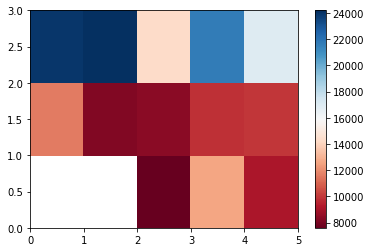

In [46]:
# Grouping data:
# We can use the groupby() method to group the data based on a categorical variable.
# - Can be applied on categorical variable.
# - Group the data into subsets according to the different categories of that variable.
# - Can group by a single variable or you can group by multiple variables by passing in multiple variable names.

# To group the data, we first extract the columns that we want to group and analyse.
dfTest = df[["drive-wheels", "body-style", "price"]]
dfTest.head()
dfGrp = dfTest.groupby(["drive-wheels", "body-style"], as_index=False).mean()
# This groups the data by the specified columns and then finds the mean of the remaining column values.
# But this data table is hard to understand from. So we can create a pivot table, that has some of the columns along the rows
# and some along the columns. 
dfPivot = dfGrp.pivot(index="drive-wheels", columns="body-style")
dfPivot

# Another way to represent the pivot table is using a heatmap plot.
# Heat map takes a rectangular grid of data and assigns a color intensity based on the data value at the grid points.
# It is a great way to plot the target variable over multiple variables and through this get visual clues of the 
# relationship between these variables and the target. 
plt.pcolor(dfPivot, cmap="RdBu") # We specified the Red-blue color scheme.
plt.colorbar()
plt.show()

In [6]:
# ANOVA
# ANOVA is a statistical test that stands for "Analysis of Variance". ANOVA can be used to find the correlation between
# different groups of a categorical variable.
# According to the car dataset, we can use ANOVA to see if there is any difference in mean price for the different 
# car makes such as Subaru and Honda.

# The ANOVA test returns two values: the F-test score and the p-value.
# The F-test calculates the ratio of variation between the groups's mean over the variatio within each of the sample groups.
# The p-value shows whether the obtained result is statistically significant.

# To perform an ANOVA between "Honda" and "Subaru"
dfAnova = df[["make","price"]]
grpAnova = dfAnova.groupby(["make"]) # Notice we don't take the mean of the price. We just group the data together.
resultsAnova1 = stats.f_oneway(grpAnova.get_group("honda")["price"], grpAnova.get_group("subaru")["price"])
print(resultsAnova1)
# The results say that: The prices between Hondas and Subarus are not significantly different, as the F-test score < 1 and 
# p-value > 0.05.
resultsAnova2 = stats.f_oneway(grpAnova.get_group("honda")["price"], grpAnova.get_group("jaguar")["price"])
print(resultsAnova2) 

# All in all, we can say that there is a strong correlation between a categorical variable and other variables, if the
# ANOVA test gives us a large F-test value and a small p-value.

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)
F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)


C:\Users\dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 55919.91784347179)

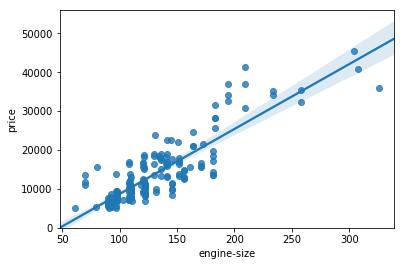

In [19]:
# Correlation:
# Correlation is a statistical metric for measuring to what extent different variables are interdependent.
# In other words, when we look at two variables over time, if one variable changes how does this affect change in the 
# other variable?

# It is important to know that correlation doesn't imply causation.
# We can visualize the correlation between two variables using a scatter plot and an added linear line called 
# a regression line.

sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)
# We can see that the straight line through the data points is very steep which shows that there's a positive linear
# relationship between the two variables. With increase in values of engine size, values of price go up as well and 
# the slope of the line is positive. So there is a positive correlation between engine size and price.

#sns.regplot(x="peak-rpm", y="price", data=df)
#plt.ylim(0,)
# This shows there is no correlation between the peak-rpm and prices

In [23]:
# Correlation Statistics:
# One way to measure the strength of the correlation between continuous numerical variable is by using a method called
# Pearson correlation.Pearson correlation method will give you two values: 
# the correlation coefficient and the P-value.

# Correlation coeff:
# - close to +1: Large +ve relationship
# - close to -1: Large -ve relationship
# - close to 0: No relationship

# p-value:
# - p < 0.001: Strong certainity in result
# - p < 0.05: Moderate certainity in result
# - p < 0.1: Weak certainity in result
# - p > 0.1: No certainity in result

# Therefore, we can say that there is a strong correlation when the correlation coefficient is close to 1 or negative 1,
# and the P-value < 0.001.

# To calculate the Pearson correlation:
corCoe, pValue = stats.pearsonr(df["horsepower"], df["price"])
print(corCoe)
print(pValue)
# We can see that the correlation coefficient is approximately.8, and this is close to 1.
# So there is a strong positive correlation.
# We can also see that the P-value is very small, much smaller than.001. 
# And so we can conclude that we are certain about the strong positive correlation.

-0.10161587407588146
0.15117691651444906
